In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("../input/Admission_Predict_Ver1.1.csv")
test=pd.read_csv("../input/Admission_Predict.csv")

In [3]:
print("Train set :",train.shape)
print("Test set :",test.shape)

Train set : (500, 9)
Test set : (400, 9)


In [4]:
train.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
test.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [16]:
test.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
train.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Not Having Research: 220
Having Research: 280


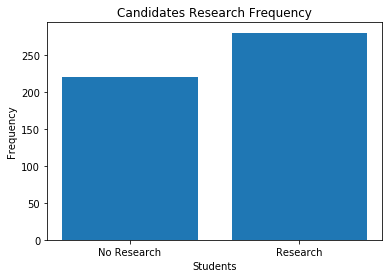

In [15]:
print("Not Having Research:",len(train[train["Research"]==0]))
print("Having Research:",len(train[train["Research"]==1]))
y=np.array([len(train[train["Research"]==0]),len(train[train["Research"]==1])])
x=["No Research","Research"]
plt.bar(x,y)
plt.xlabel("Students")
plt.ylabel("Frequency")
plt.title("Candidates Research Frequency")
plt.show()

In [19]:
train.groupby(["University Rating"]).count()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,34,34,34,34,34,34,34,34
2,126,126,126,126,126,126,126,126
3,162,162,162,162,162,162,162,162
4,105,105,105,105,105,105,105,105
5,73,73,73,73,73,73,73,73


In [47]:
k=train[["CGPA","University Rating"]].groupby(["University Rating"]).median()
train[["CGPA","University Rating"]].groupby(["University Rating"]).median()

,CGPA
University Rating,
1,7.740
2,8.170
3,8.545
4,9.020
5,9.300


Text(0.5, 1.0, 'CGPA vs University Rating')

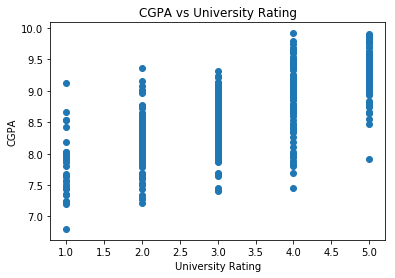

In [53]:
plt.scatter(train["University Rating"],train["CGPA"])
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.title("CGPA vs University Rating")

In [57]:
train[["Chance of Admit ","University Rating"]].groupby(["University Rating"]).median()

,Chance of Admit
University Rating,
1,0.57
2,0.64
3,0.72
4,0.82
5,0.91


Text(0.5, 1.0, 'Chance of Admit vs University Rating')

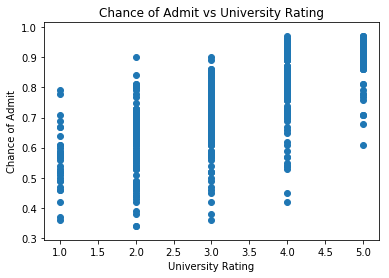

In [58]:
plt.scatter(train["University Rating"],train["Chance of Admit "])
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.title("Chance of Admit vs University Rating")